In [ ]:
# import all required libraries
import numpy as np 
import string
from nltk.corpus import stopwords
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline


In [ ]:
# importing the dataset
df = pd.read_csv(r"C:\Users\Pingu\Desktop\IBM\AI_Phase3\dialogs.txt", sep='\t')

In [ ]:
df.head()

,"hi, how are you doing?",i'm fine. how about yourself?
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?


In [ ]:
#add column names
df.columns=['Questions','Answers']
df

,Questions,Answers
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?
...,...,...
3719,that's a good question. maybe it's not old age.,are you right-handed?
3720,are you right-handed?,yes. all my life.
3721,yes. all my life.,you're wearing out your right hand. stop using...
3722,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


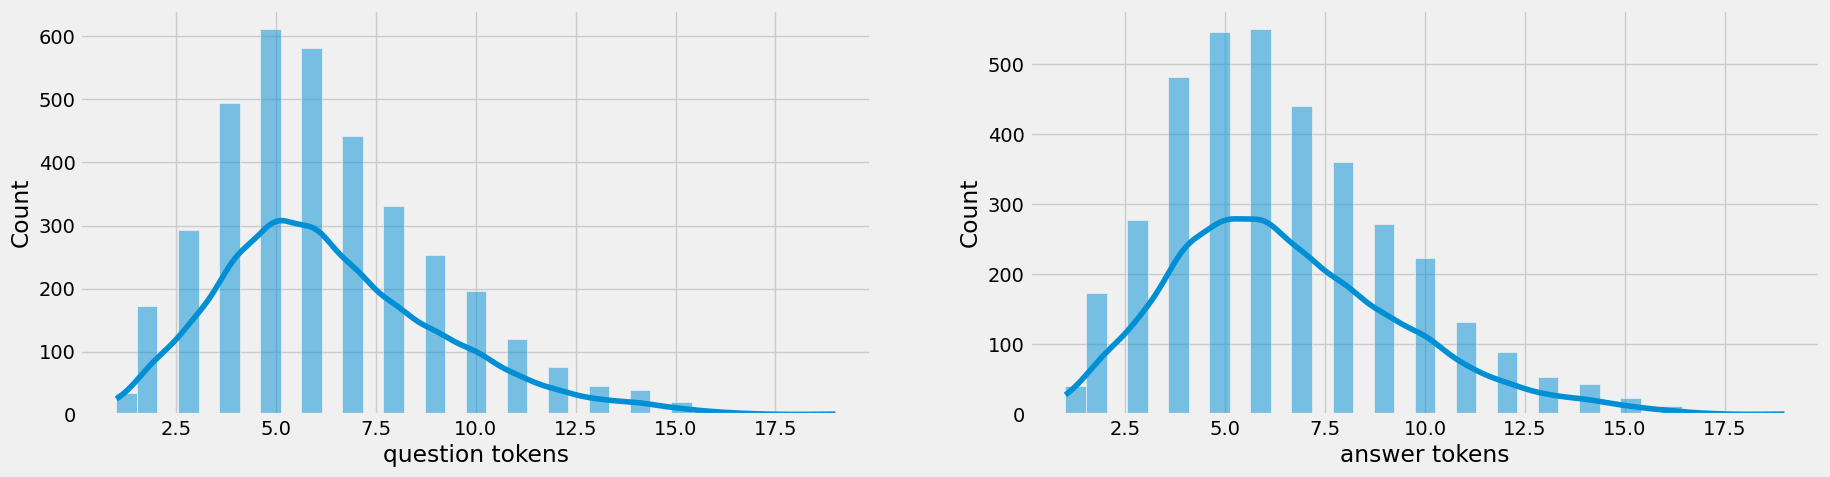

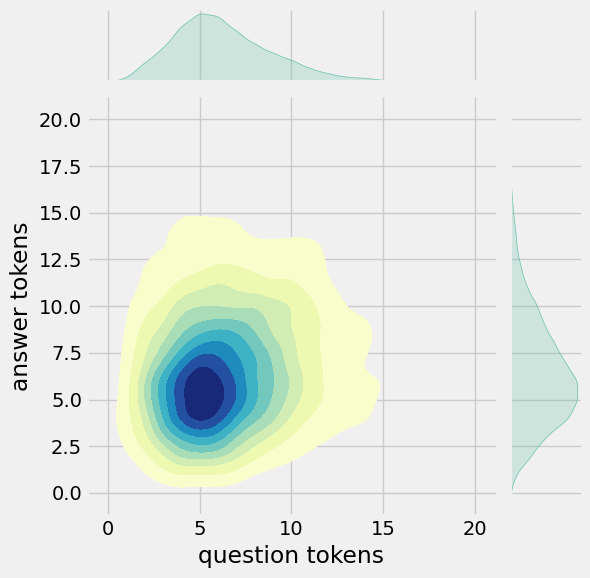

In [ ]:
# Data Preprocessing

df['question tokens']=df['Questions'].apply(lambda x:len(x.split()))
df['answer tokens']=df['Answers'].apply(lambda x:len(x.split()))
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.set_palette('Set2')
sns.histplot(x=df['question tokens'],data=df,kde=True,ax=ax[0])
sns.histplot(x=df['answer tokens'],data=df,kde=True,ax=ax[1])
sns.jointplot(x='question tokens',y='answer tokens',data=df,kind='kde',fill=True,cmap='YlGnBu')
plt.show()



In [ ]:
# Function for converting upper to lower case
def cleaner(x):
    return [a for a in (''.join([a for a in x if a not in string.punctuation])).lower().split()]

In [ ]:
# Model
Pipe = Pipeline([
    ('bow',CountVectorizer(analyzer=cleaner)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

Pipe.fit(df['Questions'],df['Answers'])



Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x000001BBB5044900>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
Pipe.fit(df['Questions'],df['Answers'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x000001BBB5044900>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
# Testing

Pipe.predict(['im fine. how about yourself'])[0]

"i'm pretty good. thanks for asking."

In [ ]:
Pipe.predict(['im pretty good. thanks for asking.'])[0]

'no problem. so how have you been?'

In [ ]:
Pipe.predict(['ive been good. im in school right now.'])[0]

'what school do you go to?'

In [ ]:
Pipe.predict(['ive been great. what about you?'])[0]

"i've been good. i'm in school right now."

In [ ]:
Pipe.predict(['great'])[0]

'i appreciate that.'

In [ ]:
Pipe.predict(['What are you doing'])[0]

"i'm going to change the light bulb. it burnt out."